In [364]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import random as r
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# ignore stupid warnings
import warnings
warnings.filterwarnings('ignore')

In [365]:
### Typography/styles

color_list = ['blue','green', 'red' , 'cyan','magenta','yellow']
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

In [366]:
df = pd.read_csv('pizza_updated.csv')
df.head()

,Company,Type,Diameter(inches),Toppings,Price_Level,Price
0,Domino's Pizza,other,10,cheese,low,5.99
1,Domino's Pizza,other,12,cheese,low,7.99
2,Domino's Pizza,other,14,cheese,low,9.99
3,Domino's Pizza,other,12,cheese,low,7.99
4,Domino's Pizza,other,10,cheese,low,5.99


summarize price first then summarize it by company

then you can look for relationships between price and other factors such as size

In [254]:
def hist_freqTable_function(dataframe,variable_name):
    ''' This will make a histogram and frequency table for a numeric variable in the dataframe'''
    
    ##### Variables to make the Histogram 
    df = dataframe[variable_name]
    observations = len(df)
    num_of_bins = round(len(df)**(1/2))
    min_num = min(df)
    max_num = max(df)
    range_num = max_num - min_num
    bin_width = round(range_num/num_of_bins)
    bin_range = np.arange(min_num,max_num+bin_width,bin_width)
    #########################################################################
    
    ##### My Histogram ###
    fig, axes = plt.subplots(figsize = (20,7),dpi=200)
    color = r.choice(color_list)
    style = r.choice(seaborn_styles)
    sns.set_style(style)
    sns.histplot(data=df,bins=bin_range,color=color);
    axes.set_title(f'histogram for {variable_name}',color='black', fontsize = 15);
    plt.show()
    
    
    
    ##### My Frequency Table ###
    FTable= df.groupby(pd.cut(df,bin_range, right=False)).count()
    FTable = FTable.to_frame()
    FTable.columns = ['Frequencies']
    FTable['Relative Frequencies'] = \
    FTable['Frequencies']/FTable['Frequencies'].sum()
    print(FTable)
    print('#'*120)
    print('#'*120)

In [255]:
def summary_statisics(dataframe,variable_name):
    '''This function will find and displays the count, mean, standard deviation, min, Q1,
    median, Q3, and max of the variable. 
    '''
    ### Summary Stats Varaibles 
    df = dataframe[variable_name].describe()
    count = df[0]
    mean = df[1]
    std =  df[2]
    min_num =  df[3]
    q1 = df[4]
    median = df[5]
    q3 = df[6]
    max_num = df[7]
    
    summary_statisics_names = ['Count','Mean','Standard Deviation','Min','Q1','Median','Q3','Max']
    summary_statisics_values = [count,mean,std,min_num,q1,median,q3,max_num]
    
   
    for i,j in zip(summary_statisics_names,summary_statisics_values):
        print(f"The {i} for {variable_name} is {j}")
    print('#'*120)
    print('#'*120)

In [256]:
def boxplot_function(dataframe,variable_name,whis=1.5):
    '''
    This function will display outliers of the variable (outside the fences) and makes a boxwhisker plot of the variable.
    Whis argument is optional in case you want to change the outlier sensitivity 
    '''
    
    df = dataframe[variable_name]
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR*whis
    upper_bound = Q3 + IQR*whis
    outliers = []
    
    fig, axes = plt.subplots(figsize = (20,7),dpi=200)
    
    color = r.choice(color_list)
    style = r.choice(seaborn_styles)
    sns.set_style(style)
    sns.boxplot(data=df,color=color, orient="h",whis=whis);
    axes.set_title('boxplot',color='black', fontsize = 15);
    plt.show()
    
    for i in df:
        if (i>upper_bound) or (i<lower_bound):
            outliers.append(i)
        
    if outliers == []:
        print('There are no outliers')
    else:
        outliers.sort()
        print(f'Here are the outlier(s): {outliers}')

# 1.) Summary For Price

In [291]:
df.describe().round(2)

,Diameter(inches),Price
count,371.00,371.00
mean,12.41,16.32
std,2.79,5.71
min,6.00,4.29
25%,12.00,12.49
50%,12.00,15.49
75%,14.00,19.95
max,18.00,29.99


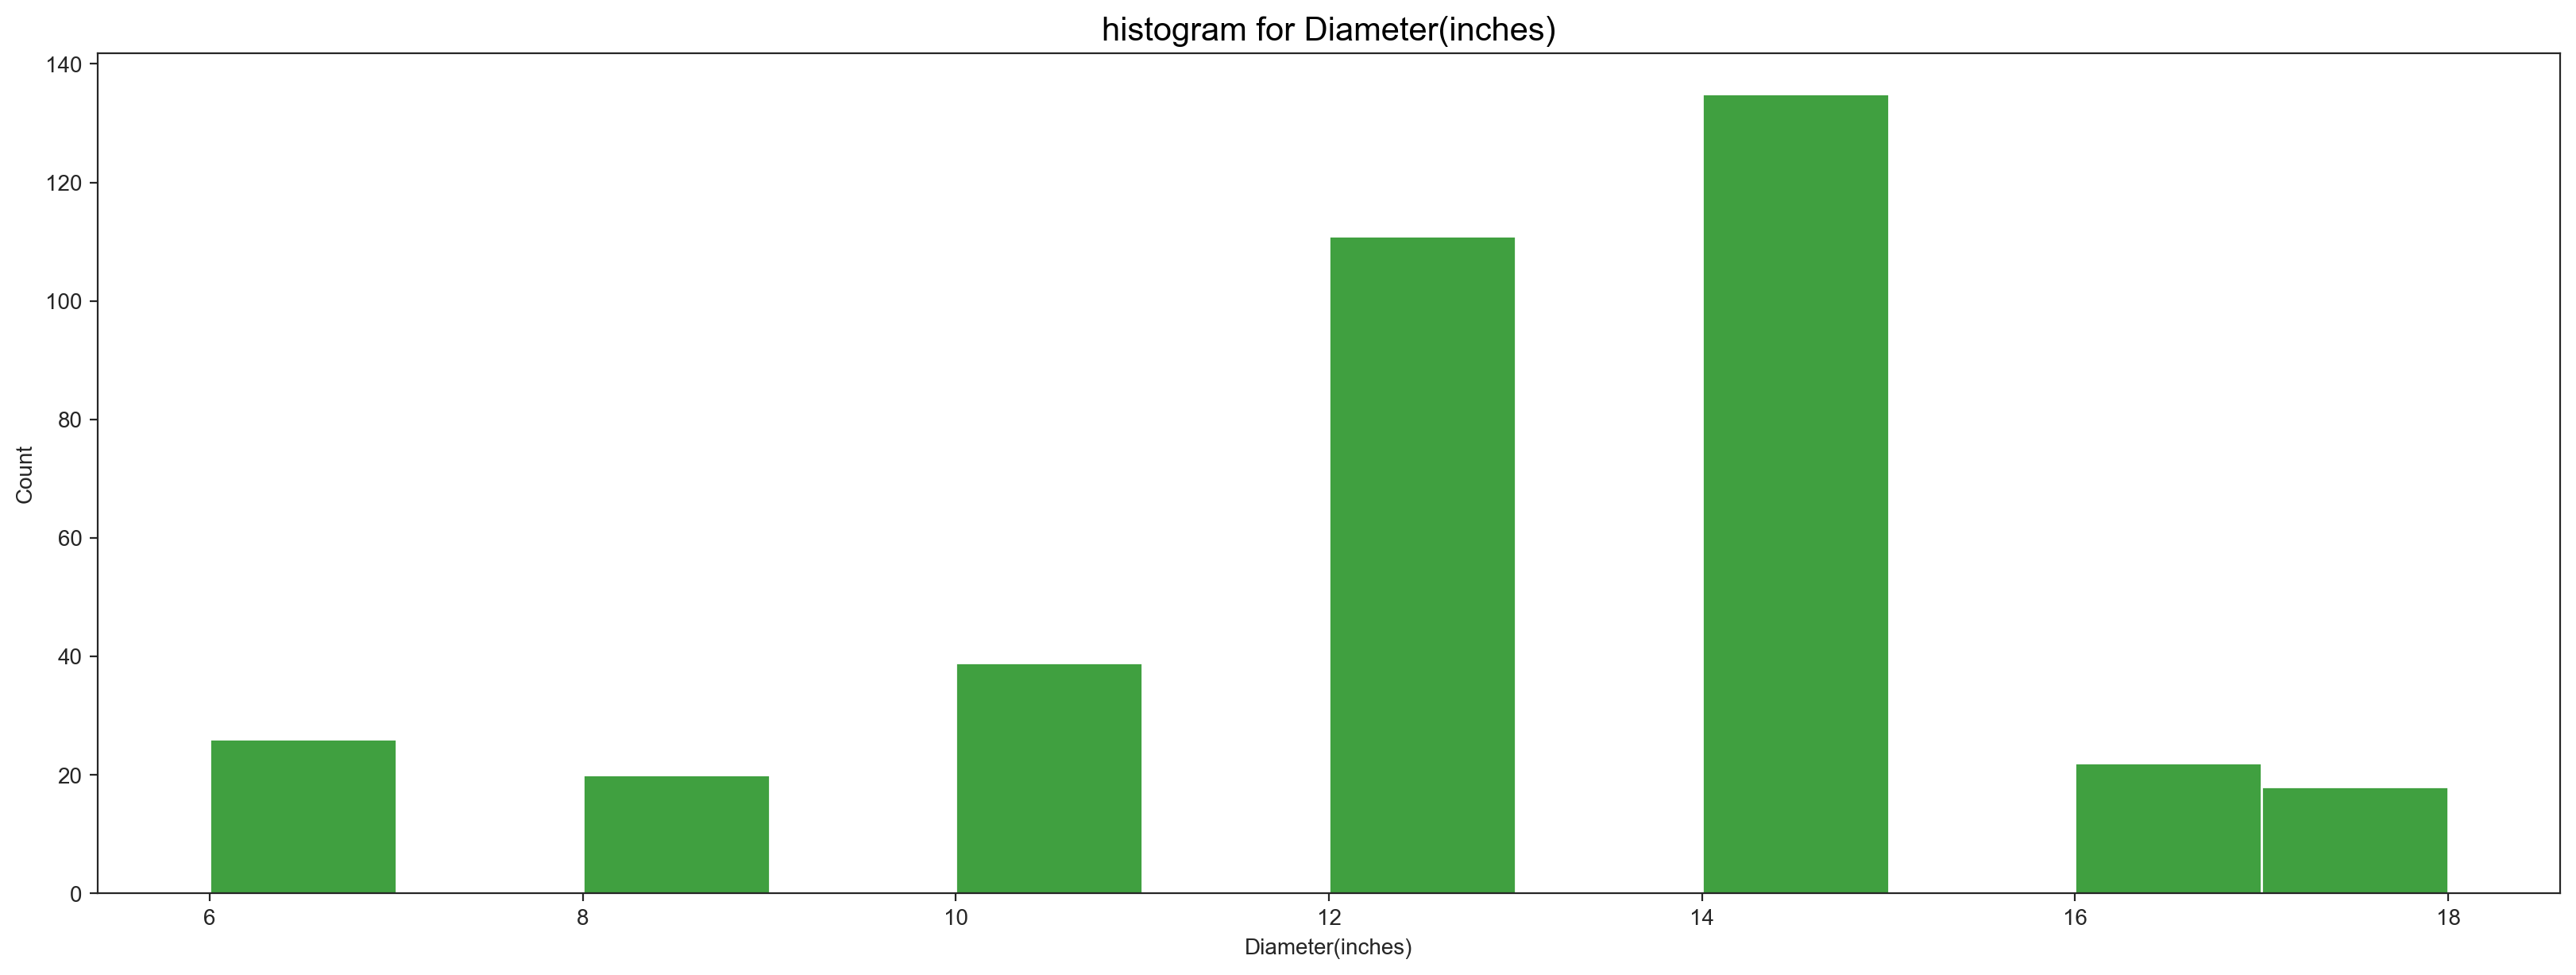

                  Frequencies  Relative Frequencies
Diameter(inches)                                   
[6, 7)                     26              0.073654
[7, 8)                      0              0.000000
[8, 9)                     20              0.056657
[9, 10)                     0              0.000000
[10, 11)                   39              0.110482
[11, 12)                    0              0.000000
[12, 13)                  111              0.314448
[13, 14)                    0              0.000000
[14, 15)                  135              0.382436
[15, 16)                    0              0.000000
[16, 17)                   22              0.062323
[17, 18)                    0              0.000000
########################################################################################################################
########################################################################################################################


In [292]:
hist_freqTable_function(df,'Diameter(inches)')

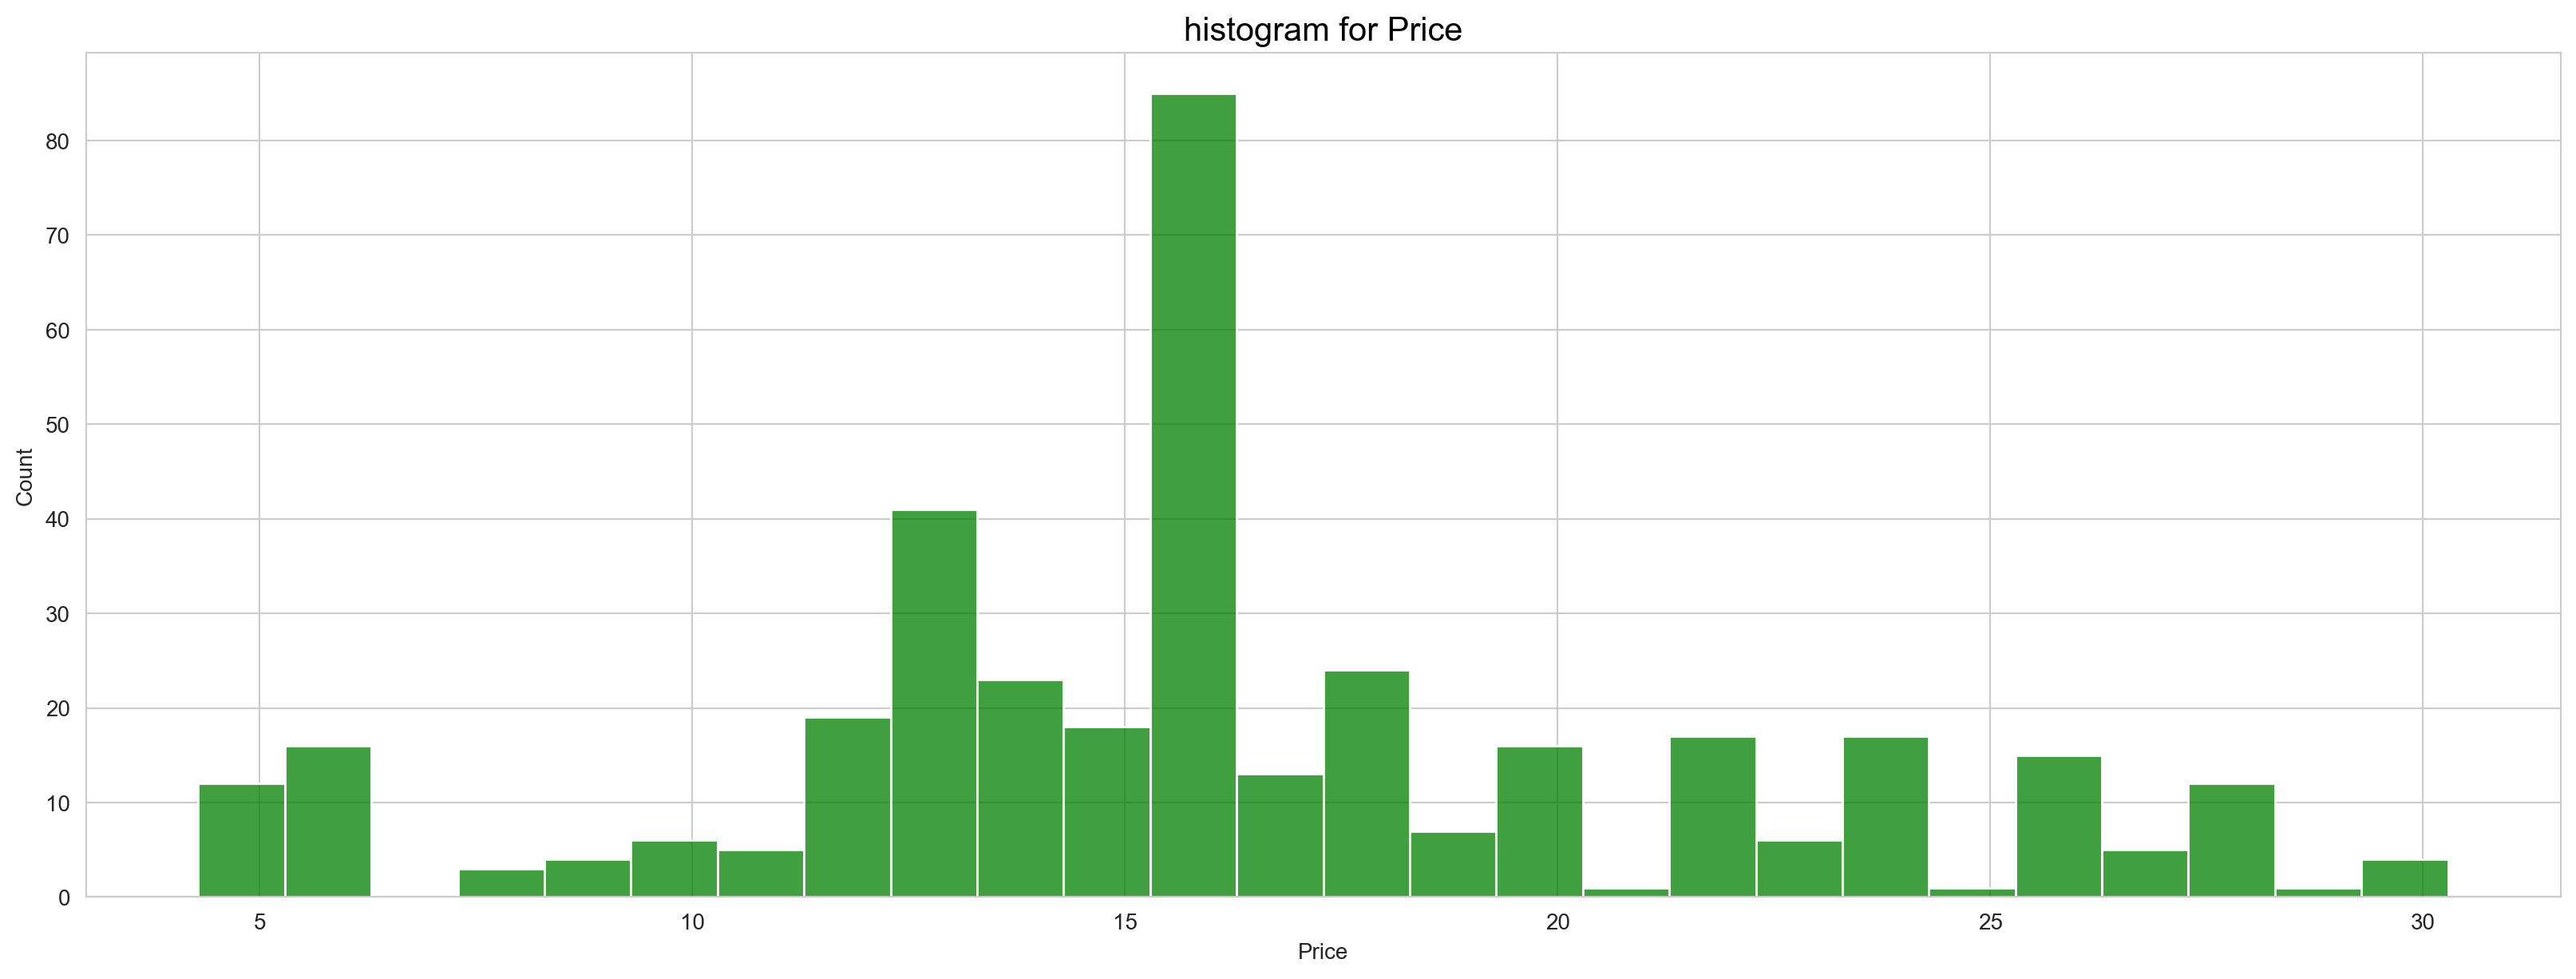

                Frequencies  Relative Frequencies
Price                                            
[4.29, 5.29)             12              0.032345
[5.29, 6.29)             16              0.043127
[6.29, 7.29)              0              0.000000
[7.29, 8.29)              3              0.008086
[8.29, 9.29)              4              0.010782
[9.29, 10.29)             6              0.016173
[10.29, 11.29)            5              0.013477
[11.29, 12.29)           19              0.051213
[12.29, 13.29)           41              0.110512
[13.29, 14.29)           23              0.061995
[14.29, 15.29)           18              0.048518
[15.29, 16.29)           85              0.229111
[16.29, 17.29)           13              0.035040
[17.29, 18.29)           24              0.064690
[18.29, 19.29)            7              0.018868
[19.29, 20.29)           16              0.043127
[20.29, 21.29)            1              0.002695
[21.29, 22.29)           17              0.045822


In [289]:
hist_freqTable_function(df,'Price')

Interpretation: 

In [259]:
summary_statisics(df,'Price')

The Count for Price is 371.0
The Mean for Price is 16.319326145552562
The Standard Deviation for Price is 5.714661781280032
The Min for Price is 4.29
The Q1 for Price is 12.49
The Median for Price is 15.49
The Q3 for Price is 19.95
The Max for Price is 29.99
########################################################################################################################
########################################################################################################################


Interpretation: 

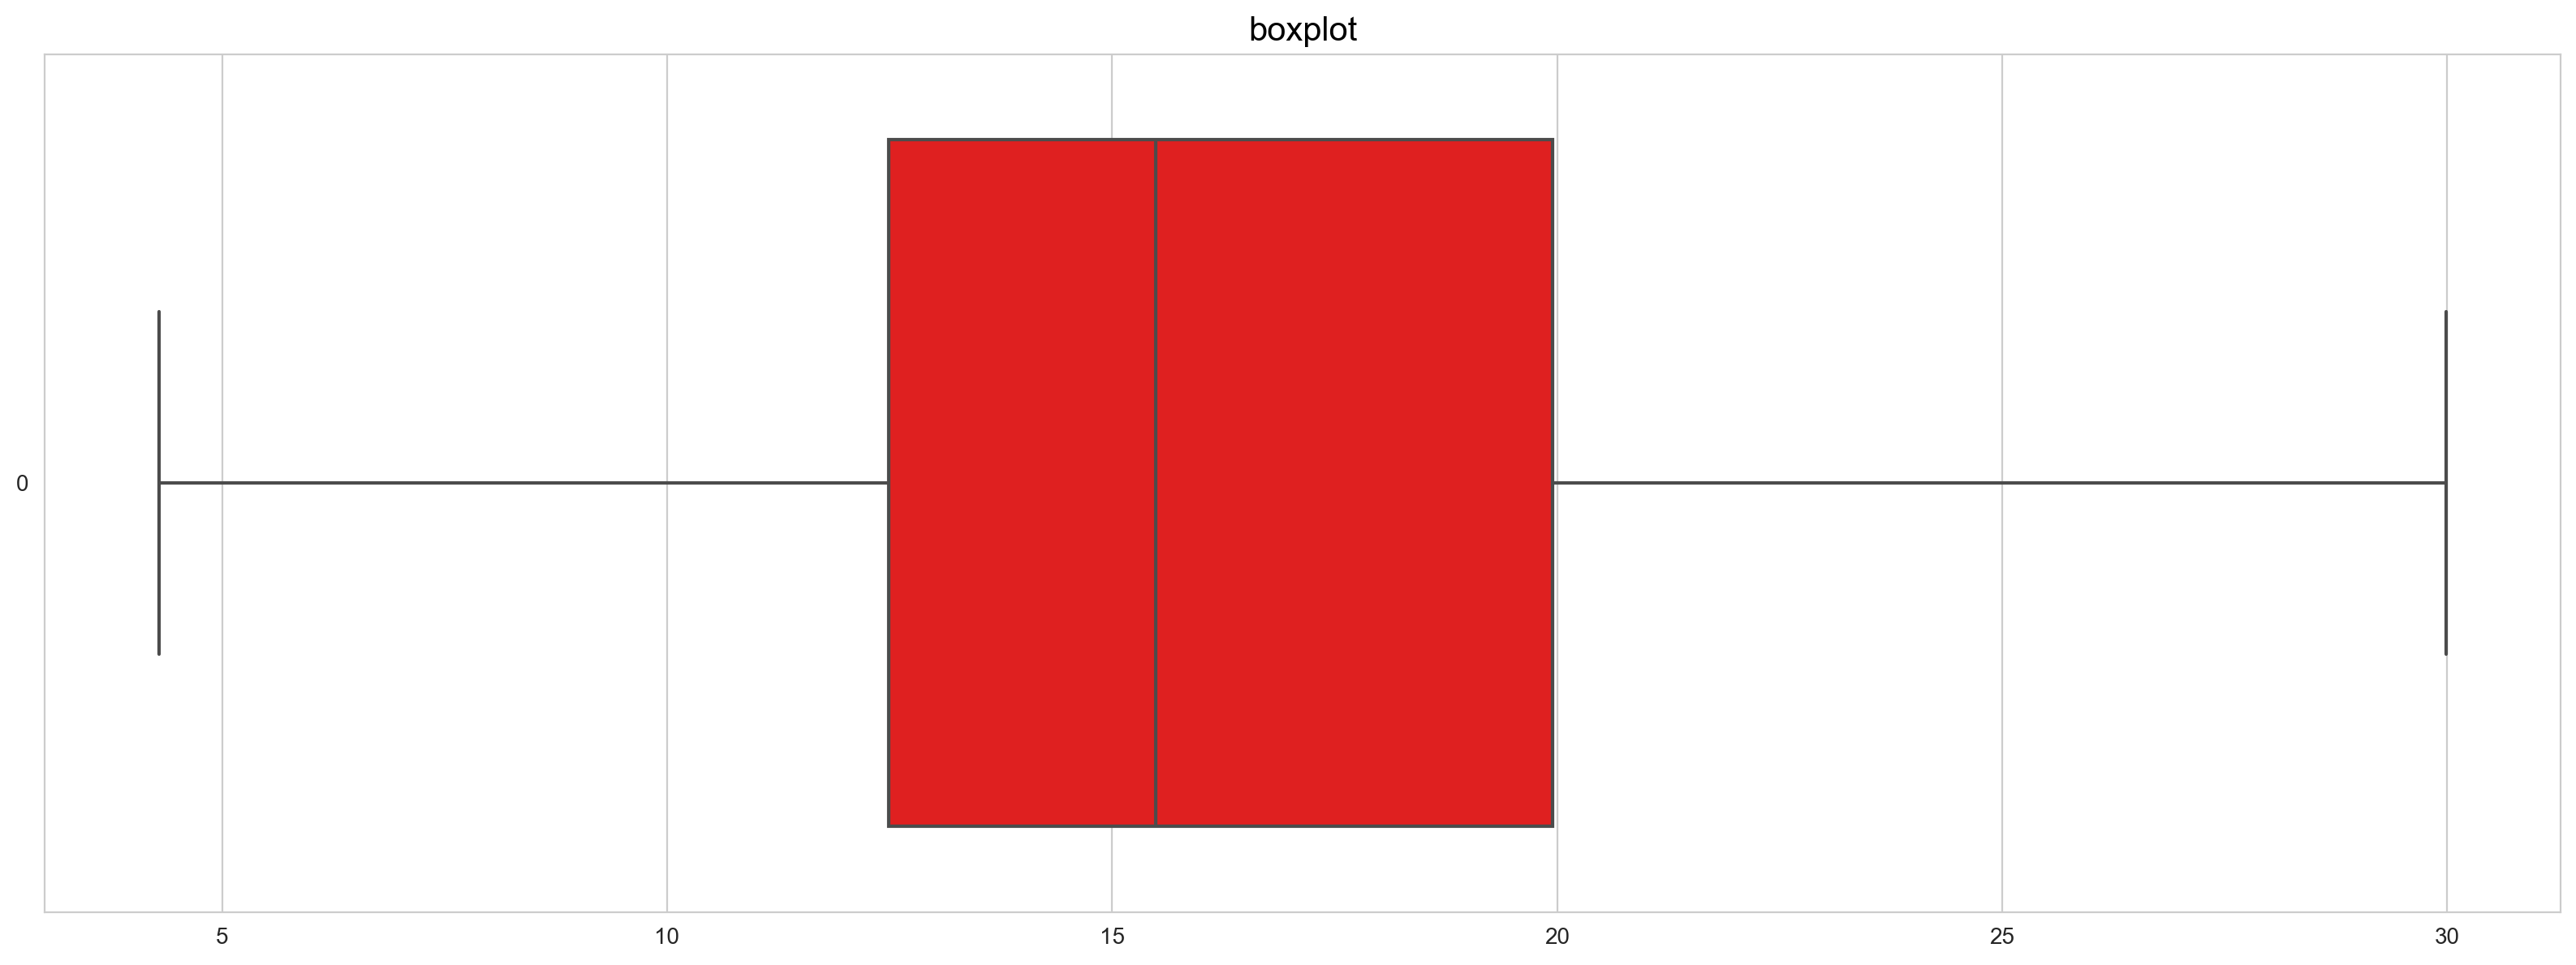

There are no outliers


In [260]:
boxplot_function(df,'Price')

Interpretation: 

# 2.) Summary For Price  by Group

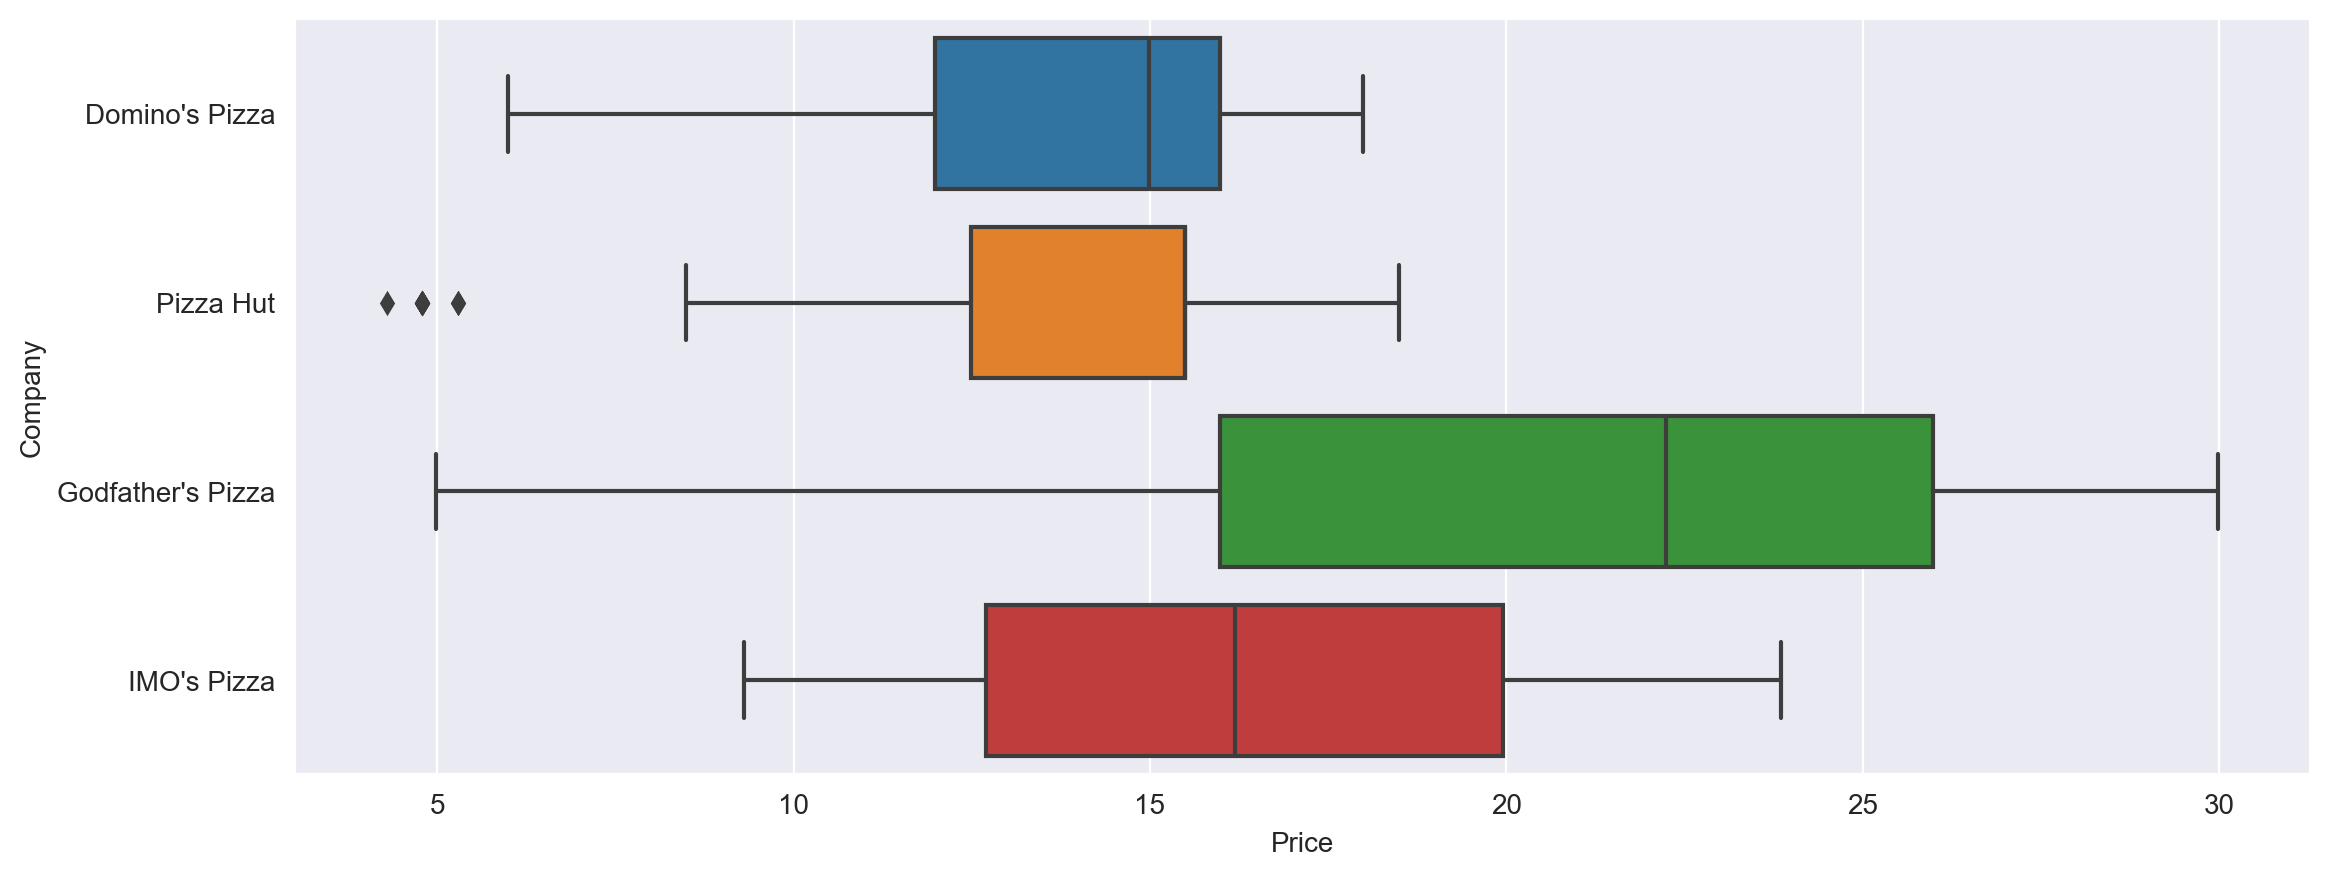

In [261]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(figsize = (13,5),dpi=200)
sns.boxplot(data=df,y='Company',x='Price');

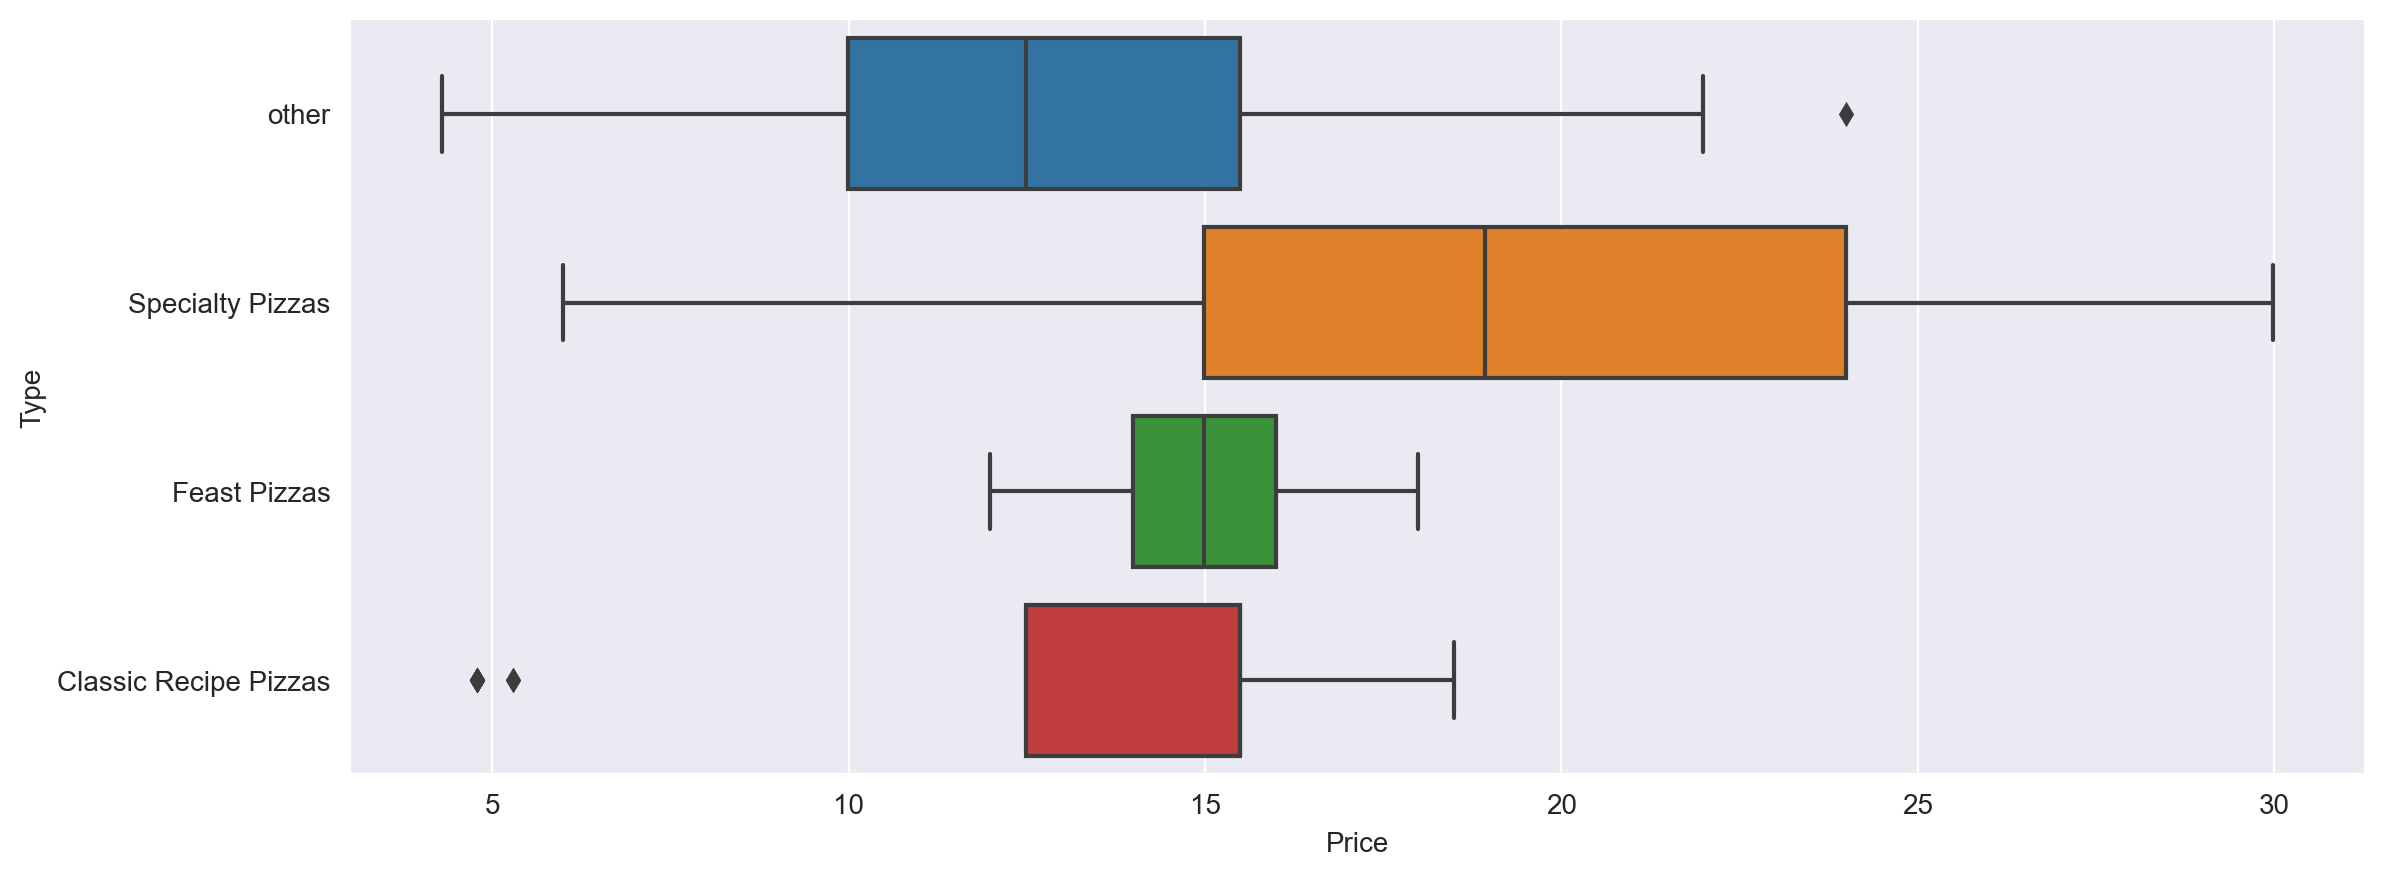

In [262]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(figsize = (13,5),dpi=200)
sns.boxplot(data=df,y='Type',x='Price');

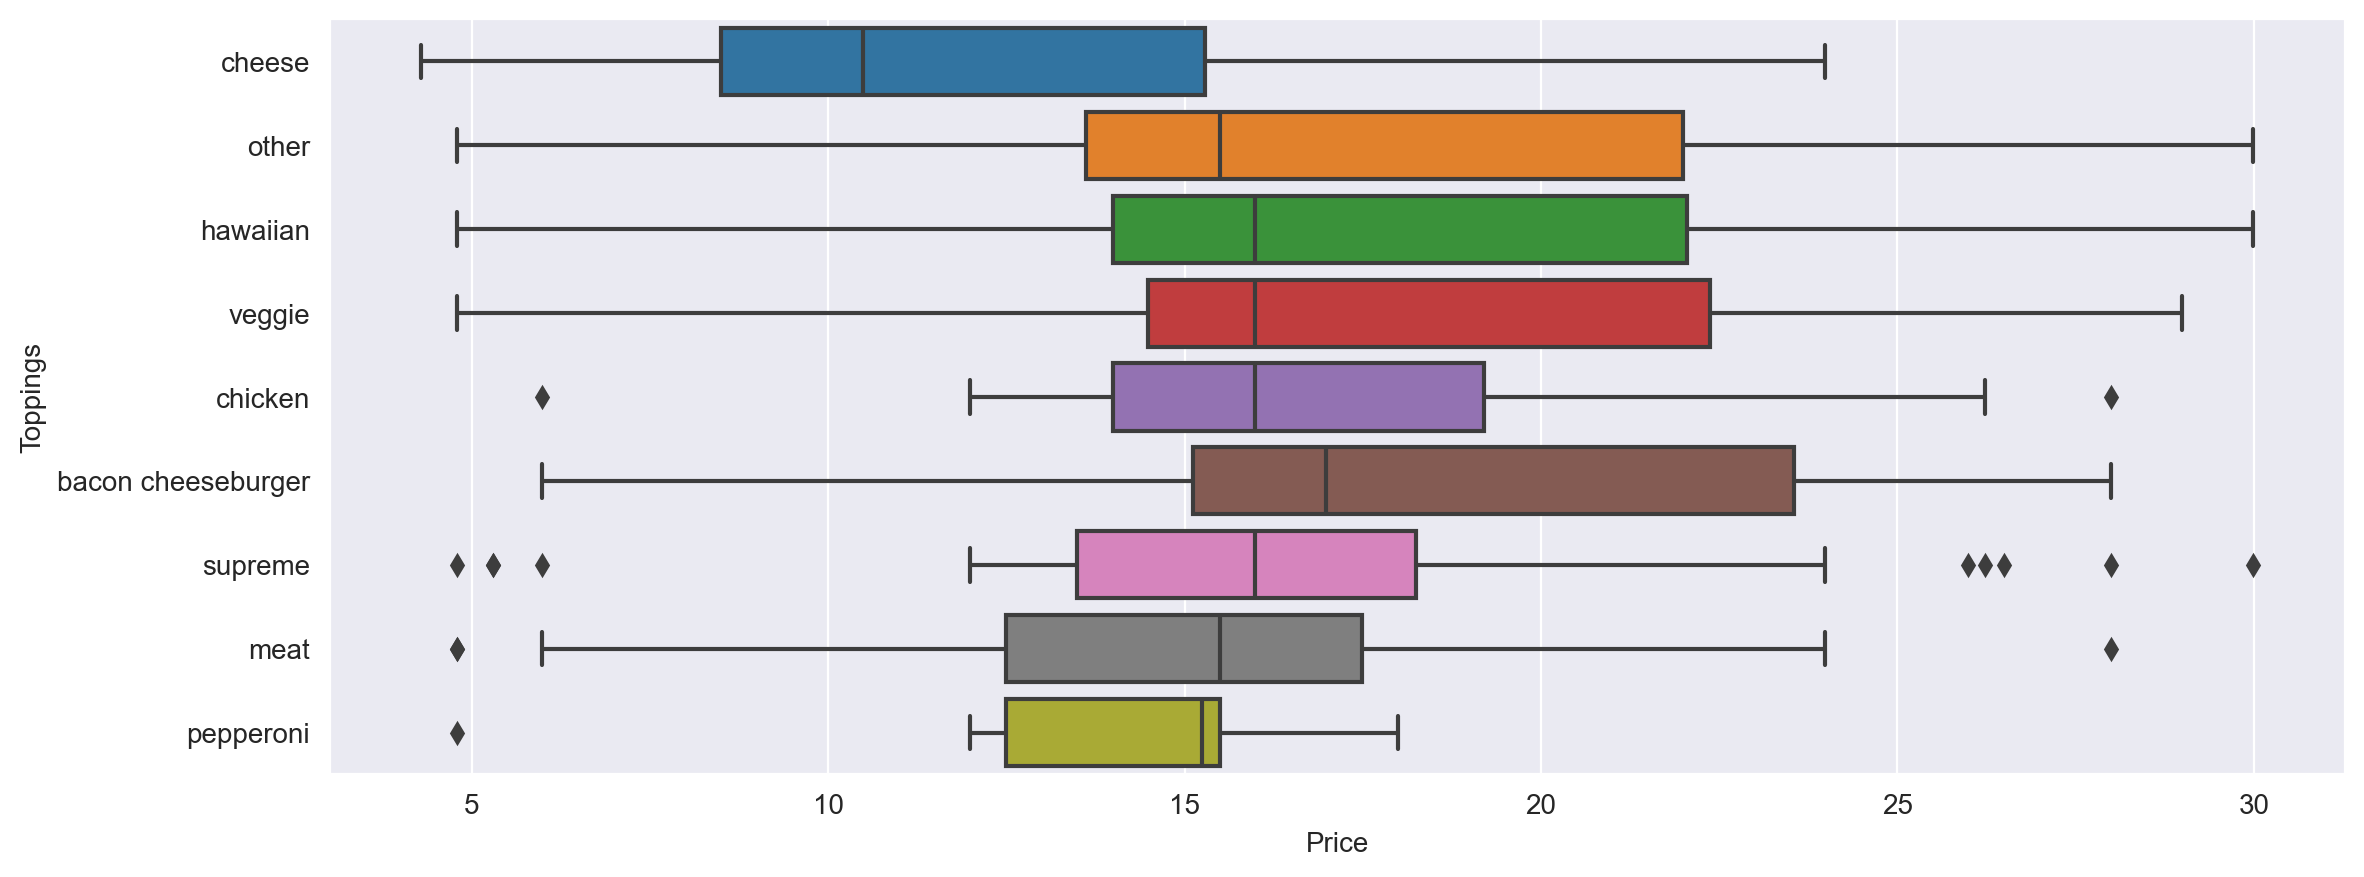

In [263]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(figsize = (13,5),dpi=200)
sns.boxplot(data=df,y='Toppings',x='Price');

In [293]:
df.groupby("Toppings").mean().round(2)

,Diameter(inches),Price
Toppings,,
bacon cheeseburger,12.18,18.33
cheese,12.36,12.04
chicken,12.48,16.81
hawaiian,12.44,17.44
meat,12.24,15.37
other,12.43,17.01
pepperoni,12.43,14.05
supreme,12.47,16.48
veggie,12.52,17.80


Interpretation: 

In [265]:
df.groupby("Company").std().round()

,Diameter(inches),Price
Company,,
Domino's Pizza,2.0,3.0
Godfather's Pizza,3.0,7.0
IMO's Pizza,2.0,4.0
Pizza Hut,2.0,3.0


Interpretation: 

In [266]:
df.groupby("Company").min()

,Type,Diameter(inches),Toppings,Price_Level,Price
Company,,,,,
Domino's Pizza,Feast Pizzas,10,bacon cheeseburger,high,5.99
Godfather's Pizza,Specialty Pizzas,6,bacon cheeseburger,high,4.99
IMO's Pizza,Specialty Pizzas,10,cheese,high,9.30
Pizza Hut,Classic Recipe Pizzas,6,bacon cheeseburger,high,4.29


Interpretation: 

Interpretation: 

In [267]:
df.groupby("Company").count()

,Type,Diameter(inches),Toppings,Price_Level,Price
Company,,,,,
Domino's Pizza,88,88,88,88,88
Godfather's Pizza,133,133,133,133,133
IMO's Pizza,24,24,24,24,24
Pizza Hut,126,126,126,126,126


In [268]:
df.groupby("Company").describe().round(2)

Diameter(inches)                                             \
                             count   mean   std   min   25%   50%   75%   max   
Company                                                                         
Domino's Pizza                88.0  12.39  2.27  10.0  10.0  12.0  14.0  16.0   
Godfather's Pizza            133.0  12.23  3.50   6.0  12.0  12.0  14.0  18.0   
IMO's Pizza                   24.0  13.00  2.28  10.0  11.5  13.0  14.5  16.0   
Pizza Hut                    126.0  12.51  2.36   6.0  12.0  14.0  14.0  14.0   

                   Price                                                 
                   count   mean   std   min    25%    50%    75%    max  
Company                                                                  
Domino's Pizza      88.0  14.29  2.81  5.99  11.99  14.99  15.99  17.99  
Godfather's Pizza  133.0  20.27  6.70  4.99  15.99  22.24  25.99  29.99  
IMO's Pizza         24.0  17.10  4.43  9.30  12.70  16.20  19.95  23.85  
Pizza Hut          126.0  13.42  3.46  4.29  12.49  15.49  15.49  18.49

Interpretation: 

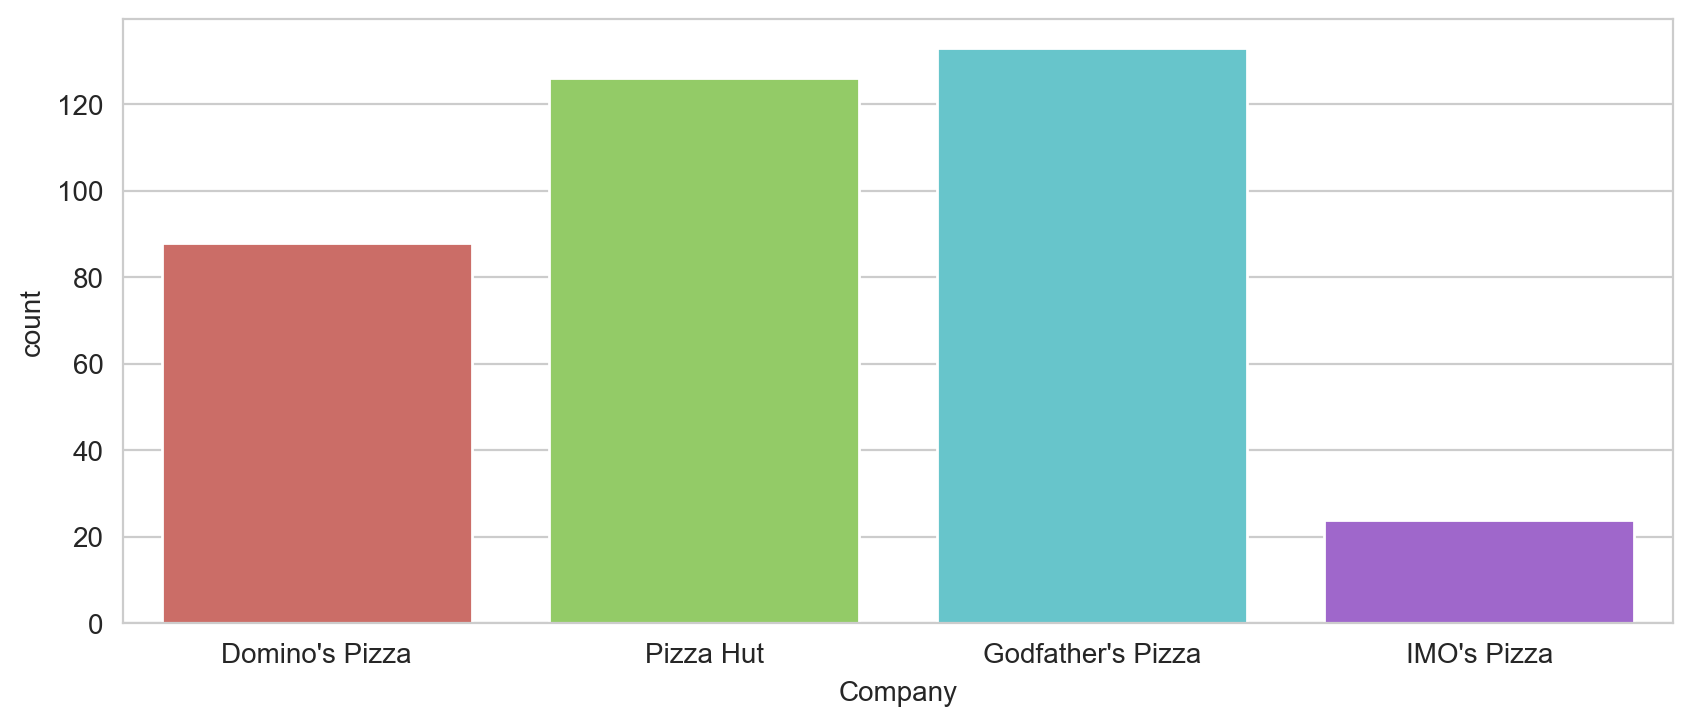

In [269]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize = (10,4),dpi=200)
sns.countplot(data=df,x='Company',palette='hls');

In [270]:
df['Company'].value_counts()

Godfather's Pizza    133
Pizza Hut            126
Domino's Pizza        88
IMO's Pizza           24
Name: Company, dtype: int64

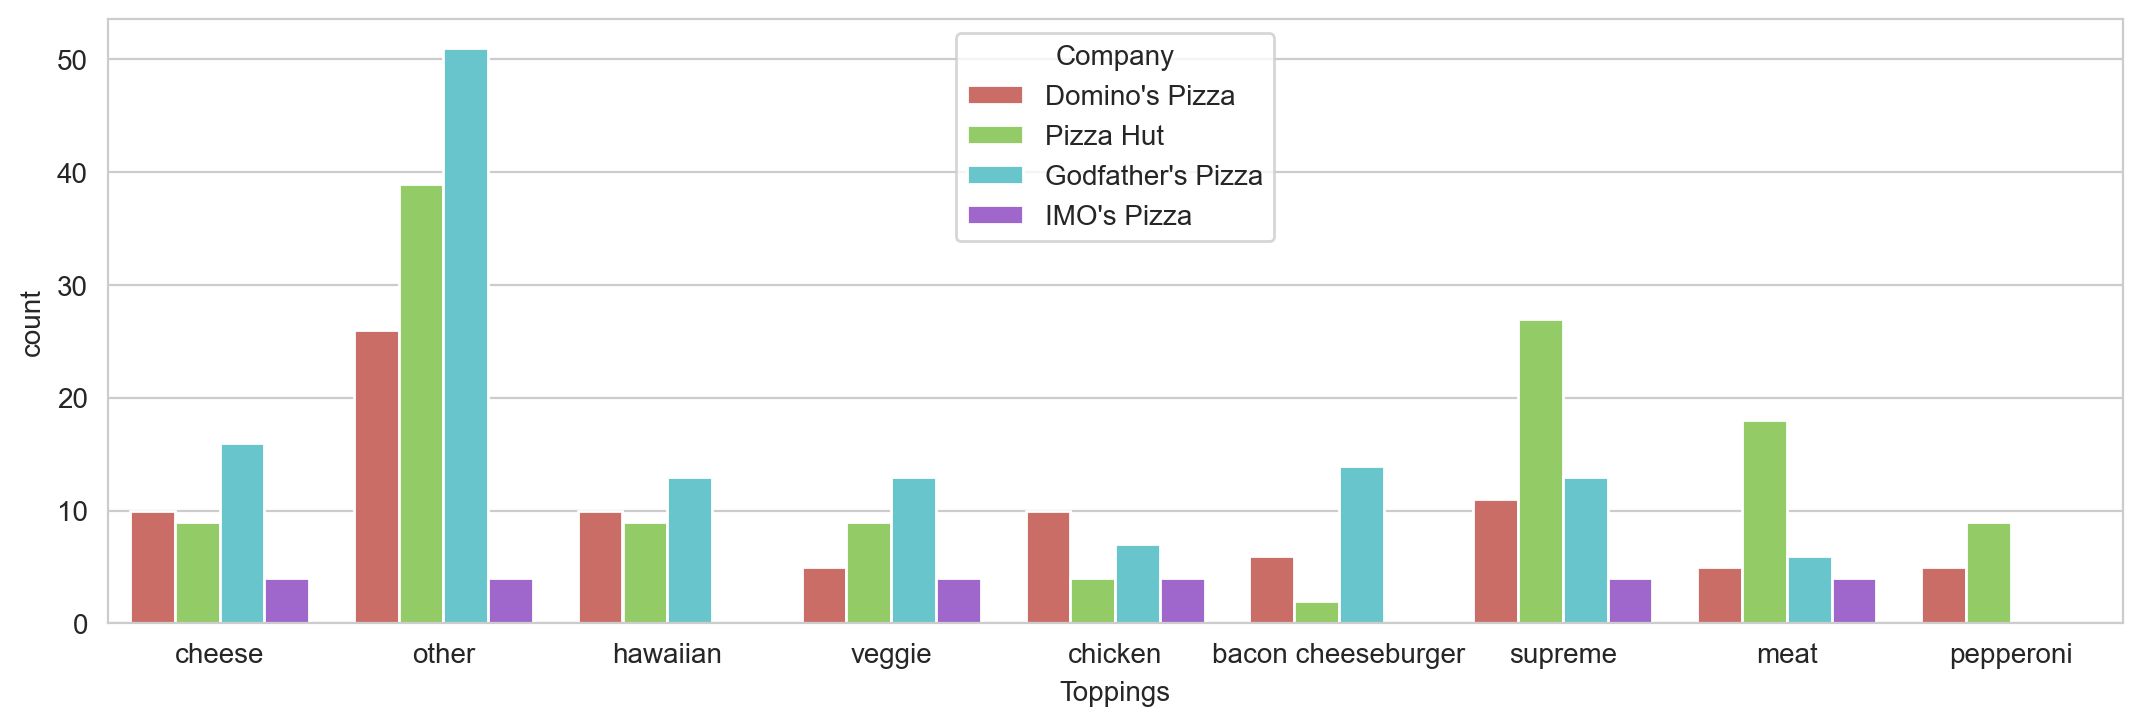

In [271]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize = (13,4),dpi=200)
sns.countplot(data=df,x='Toppings',hue='Company',palette='hls');

In [272]:
df['Toppings'].value_counts()

other                 120
supreme                55
cheese                 39
meat                   33
hawaiian               32
veggie                 31
chicken                25
bacon cheeseburger     22
pepperoni              14
Name: Toppings, dtype: int64

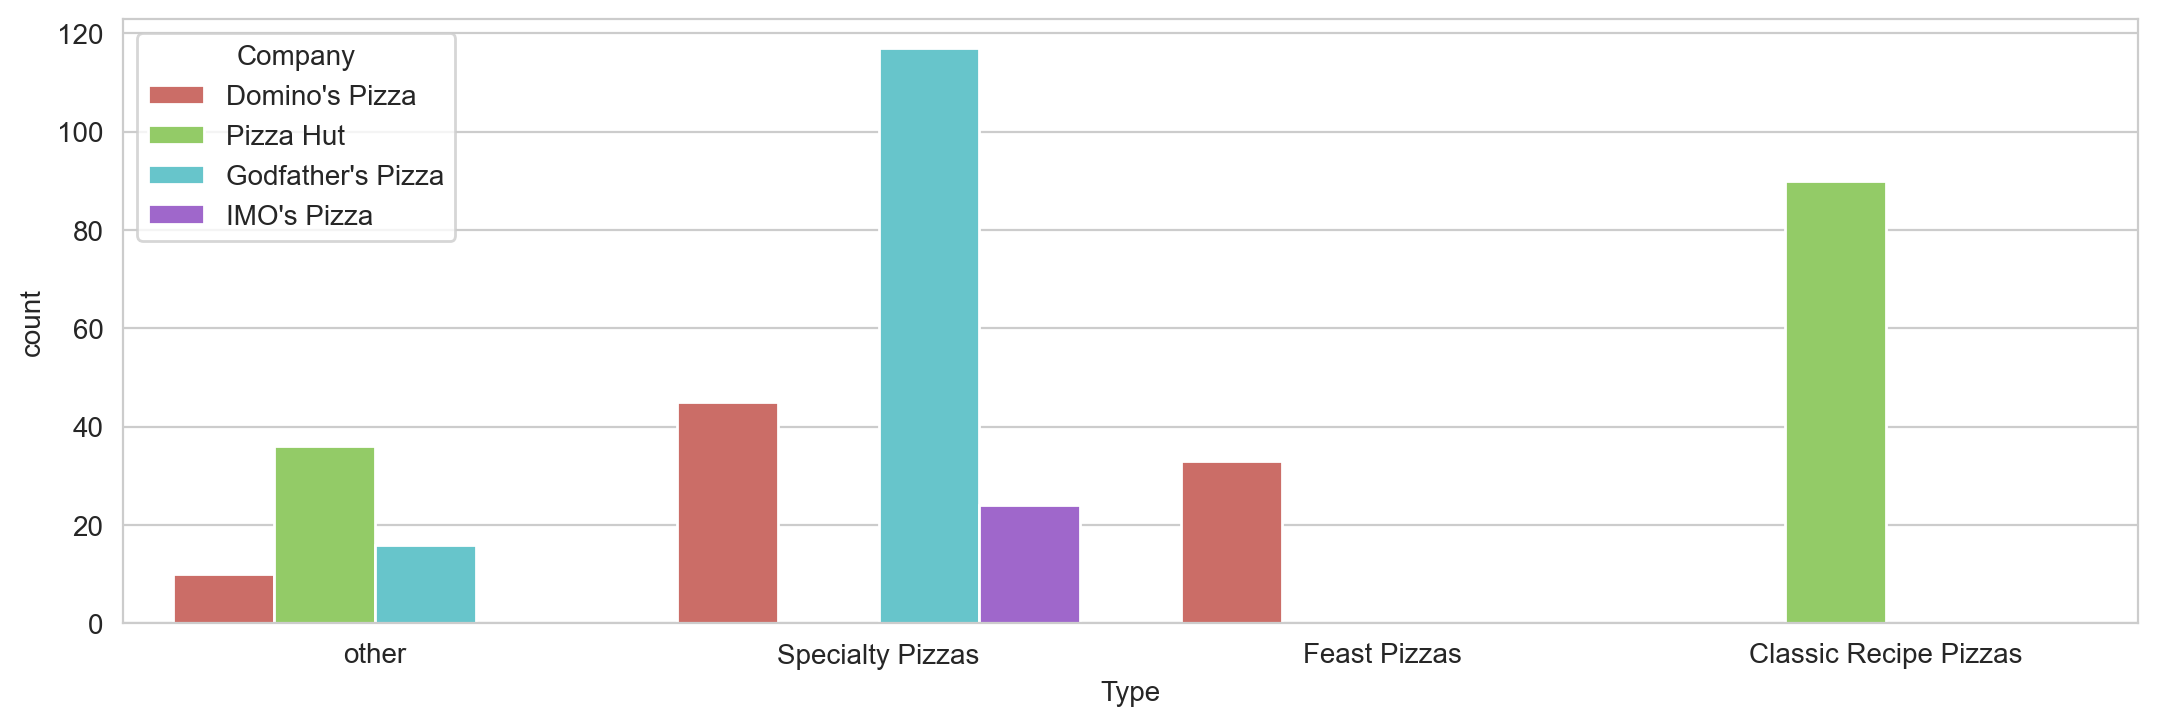

In [273]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize = (13,4),dpi=200)
sns.countplot(data=df,x='Type',hue='Company',palette='hls');

In [274]:
df['Type'].value_counts()

Specialty Pizzas         186
Classic Recipe Pizzas     90
other                     62
Feast Pizzas              33
Name: Type, dtype: int64

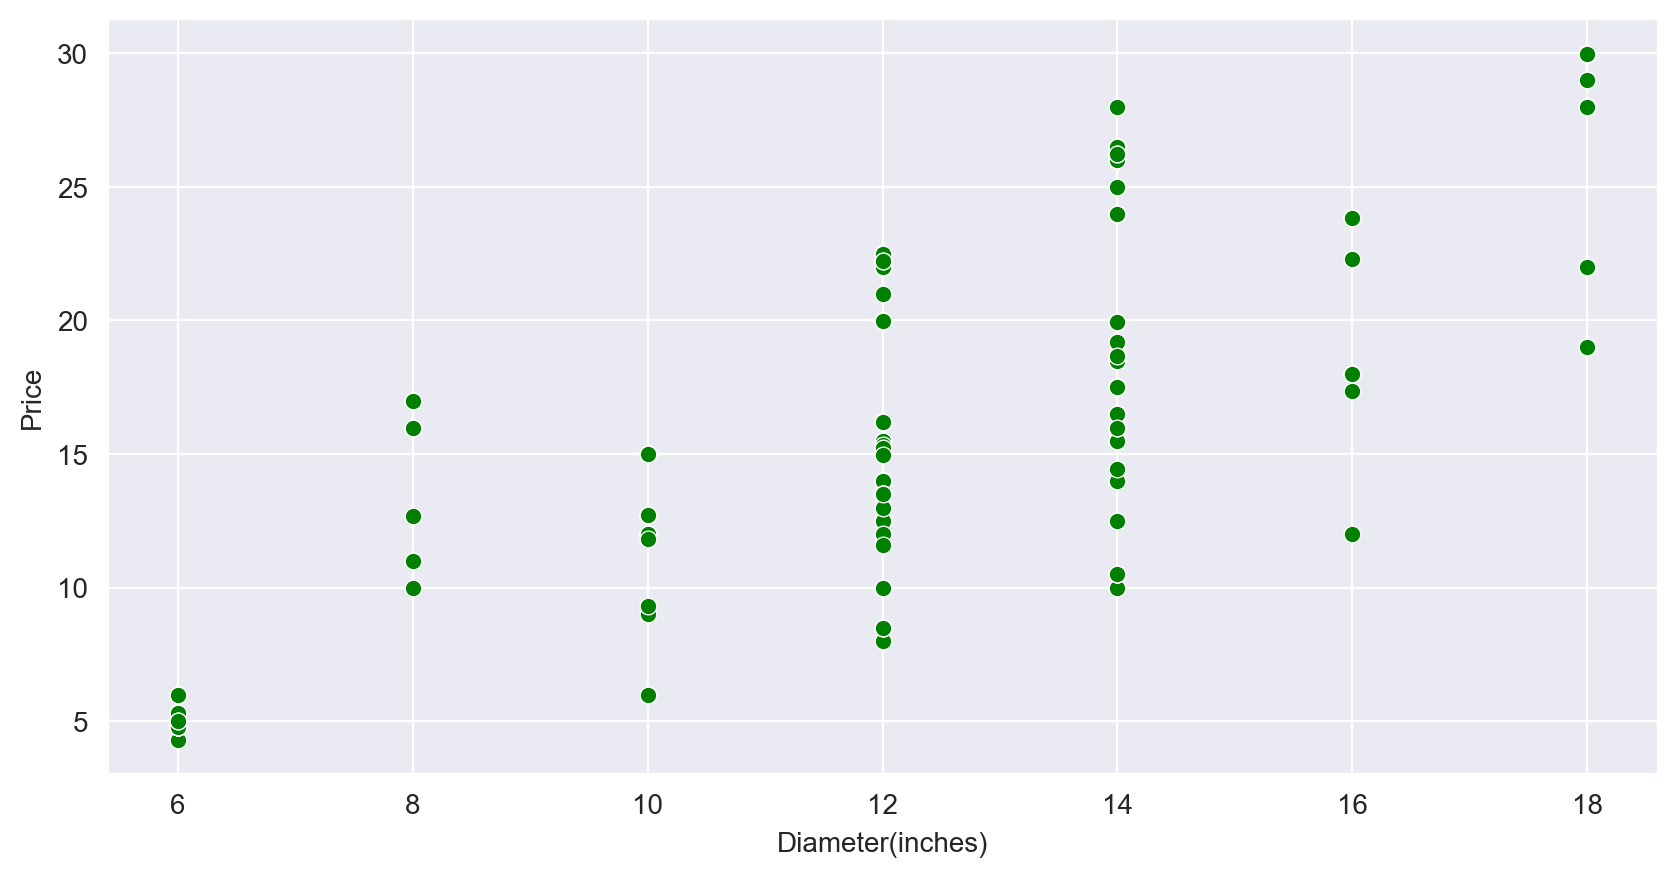

In [275]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(figsize = (10,5),dpi=200)
sns.scatterplot(data=df,x='Diameter(inches)',y='Price',color='green');

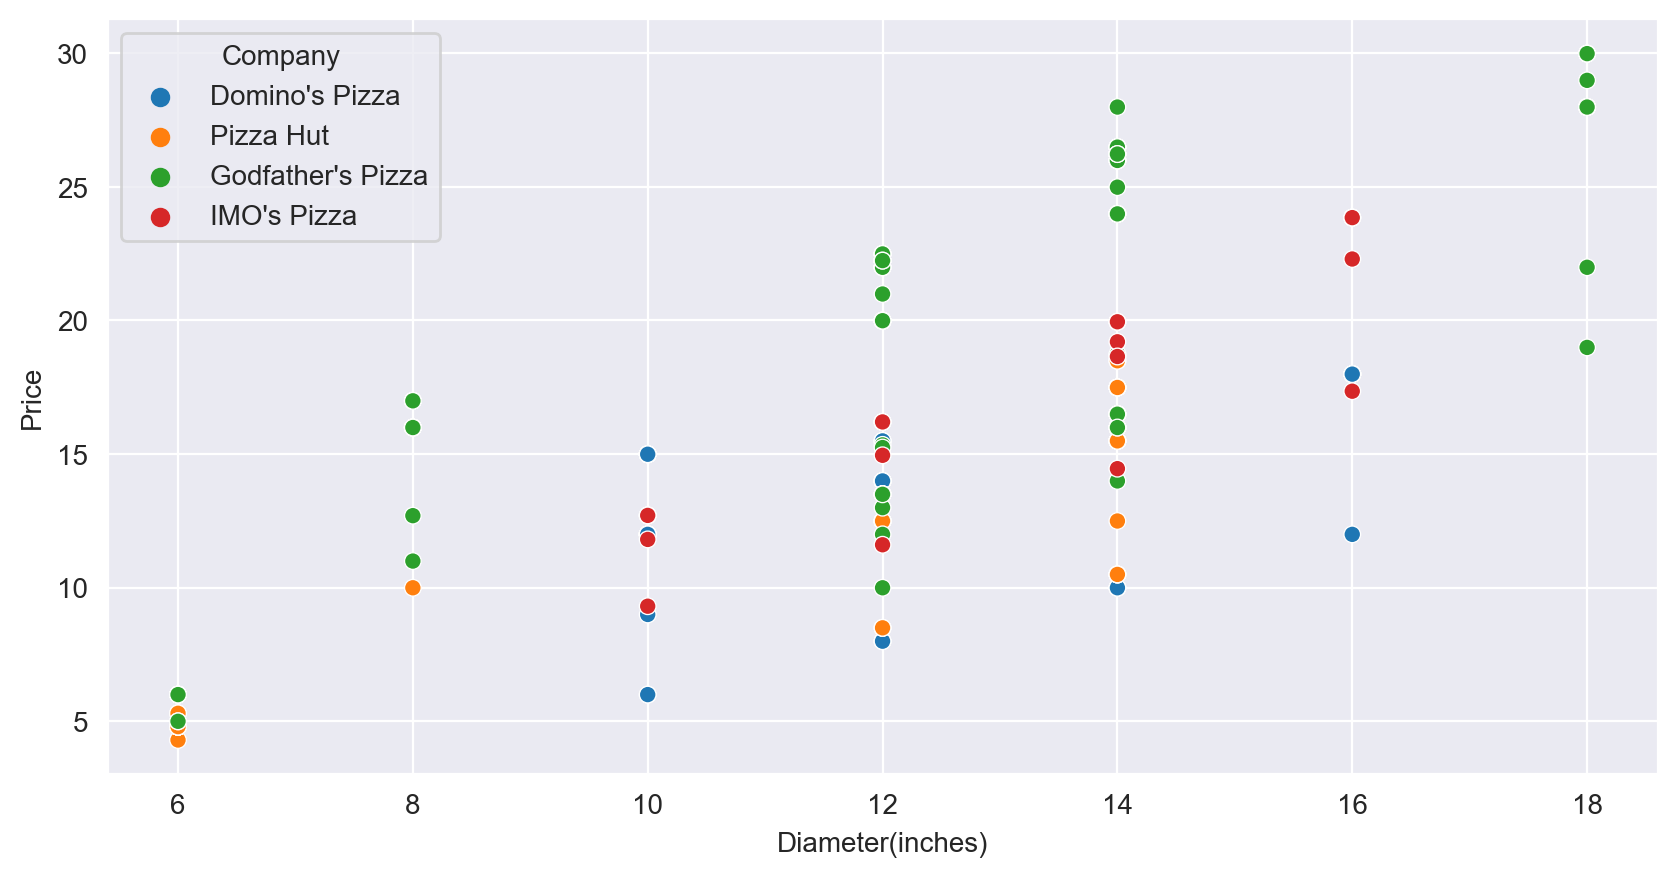

In [276]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(figsize = (10,5),dpi=200)
sns.scatterplot(data=df,x='Diameter(inches)',y='Price',color='red',hue="Company");

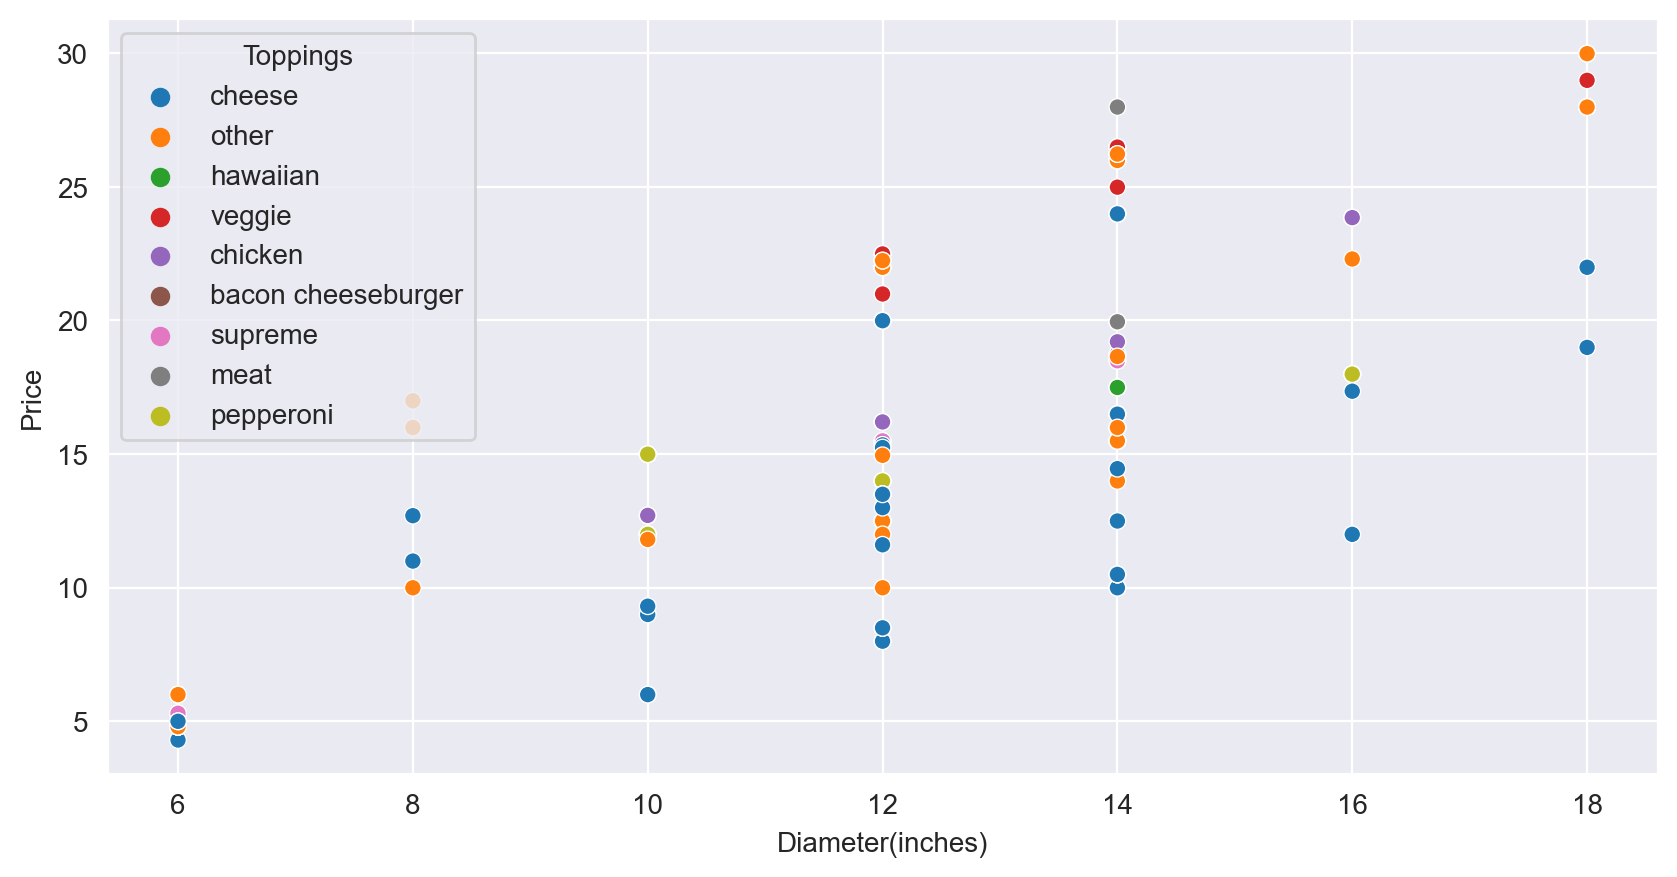

In [277]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(figsize = (10,5),dpi=200)
sns.scatterplot(data=df,x='Diameter(inches)',y='Price',color='red',hue="Toppings");

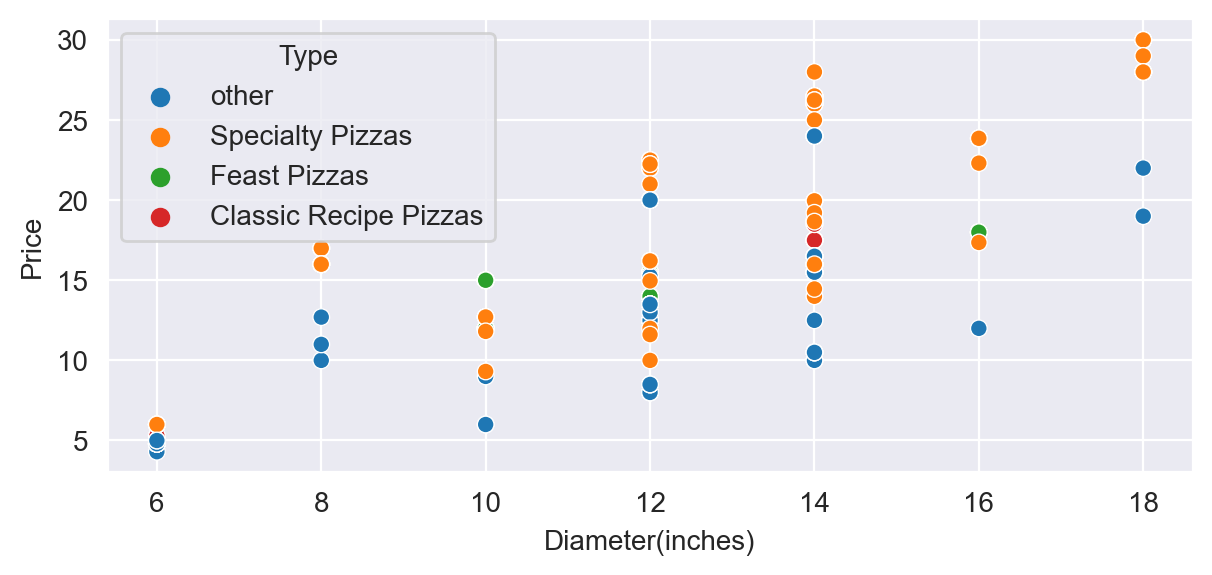

In [278]:
sns.set_style('darkgrid')
sns.color_palette("rocket", as_cmap=True)
fig, axes = plt.subplots(figsize = (7,3),dpi=200)
sns.scatterplot(data=df,x='Diameter(inches)',y='Price',color='red',hue="Type");

In [279]:
pizza_toppings = df["Toppings"].copy().value_counts().rename_axis('toppings').reset_index(name='counts')
pizza_toppings.head()

,toppings,counts
0,other,120
1,supreme,55
2,cheese,39
3,meat,33
4,hawaiian,32


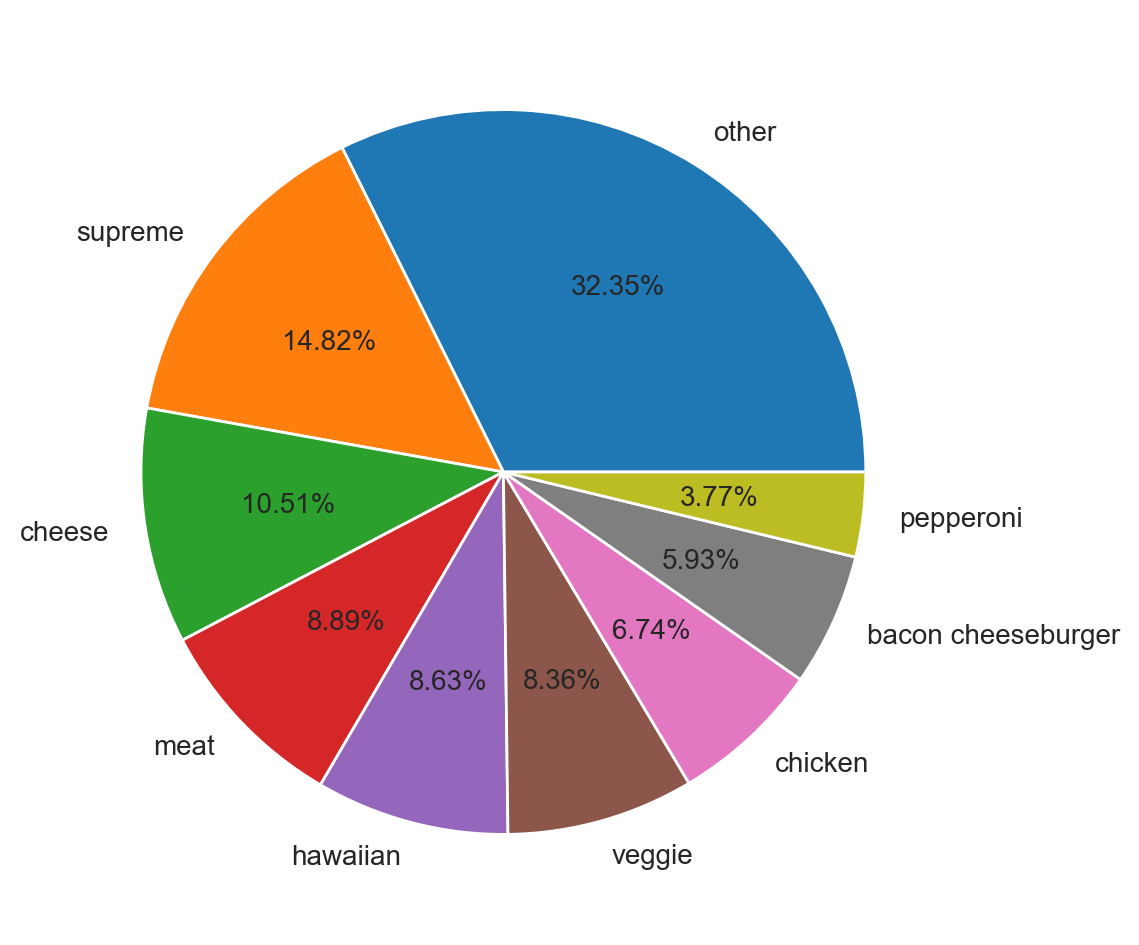

In [280]:
labels = pizza_toppings['toppings']
values = pizza_toppings['counts']

sns.set_style('darkgrid')
sns.color_palette("rocket", as_cmap=True)
fig, axes = plt.subplots(figsize = (15,6),dpi=200)
axes.pie(x=values, labels = labels, autopct='%1.2f%%');

In [297]:
df.head()

,Company,Type,Diameter(inches),Toppings,Price_Level,Price
0,Domino's Pizza,other,10,cheese,low,5.99
1,Domino's Pizza,other,12,cheese,low,7.99
2,Domino's Pizza,other,14,cheese,low,9.99
3,Domino's Pizza,other,12,cheese,low,7.99
4,Domino's Pizza,other,10,cheese,low,5.99


In [282]:
df['Type'].value_counts()

Specialty Pizzas         186
Classic Recipe Pizzas     90
other                     62
Feast Pizzas              33
Name: Type, dtype: int64

In [300]:
df[df["Company"] == "Pizza Hut"]['Price']

88      8.49
89     10.49
90      4.29
91      8.49
92     10.49
       ...  
209    15.49
210    15.49
211    15.49
212    15.49
213     9.99
Name: Price, Length: 126, dtype: float64

In [311]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(df[df["Company"] == "Domino's Pizza"]['Price'])


ShapiroResult(statistic=0.9109892249107361, pvalue=1.5932768292259425e-05)

In [302]:
len(df[df["Company"] == "Pizza Hut"]['Price'])

126

In [307]:
from numpy.random import randn
x = randn(100)

array([ 1.93730049,  0.98354739, -0.84883118, -0.6294406 ,  1.51554104,
       -1.40893533,  0.49618245, -0.92989667, -0.16003932,  0.50246659,
       -0.50228612,  0.13866332,  2.83745153,  0.48600118,  0.24168631,
        0.77907227,  1.42773895,  0.98829734,  0.58633558,  0.30592244,
        0.58918696, -0.9435654 , -0.36820417,  0.94376733, -1.55419022,
        2.06879149,  0.35671413,  0.28859382, -1.22331509,  0.30679563,
       -1.57186709, -1.95715839, -1.48292831,  1.41121357,  1.36013391,
       -1.96044748,  0.79890853,  0.53493037, -0.37049966,  0.39753966,
       -0.72540663,  0.6431433 ,  1.4033386 , -0.70836375, -0.44016166,
       -0.91548504,  0.37951384, -0.88015254, -0.64736486,  0.58228621,
       -0.69579443, -0.06776179,  1.14165957,  0.70215191, -0.93319318,
       -1.13623131,  0.83054953, -0.6782413 , -0.9434587 ,  0.67788138,
        1.27190523, -0.57105076,  1.08788241,  0.42054931,  1.82746718,
        1.5520978 , -1.35490107,  0.98125824,  1.22046467,  0.49

In [309]:
df[df["Company"] == "Pizza Hut"]['Price']

88      8.49
89     10.49
90      4.29
91      8.49
92     10.49
       ...  
209    15.49
210    15.49
211    15.49
212    15.49
213     9.99
Name: Price, Length: 126, dtype: float64

In [358]:
df[df['Toppings']== 'cheese']["Price_Level"].value_counts()

low       27
high       6
medium     6
Name: Price_Level, dtype: int64

In [339]:
df[df['Toppings']== 'bacon cheeseburger']["Price_Level"].value_counts()

high      11
medium     7
low        4
Name: Price_Level, dtype: int64

In [340]:
df[df['Toppings']== 'chicken']["Price_Level"].value_counts()

medium    10
high       9
low        6
Name: Price_Level, dtype: int64

In [341]:
df[df['Toppings']== 'hawaiian']["Price_Level"].value_counts()

high      13
medium    12
low        7
Name: Price_Level, dtype: int64

In [342]:
df[df['Toppings']== 'meat']["Price_Level"].value_counts()

medium    13
low       11
high       9
Name: Price_Level, dtype: int64

In [344]:
df[df['Toppings']== 'other']["Price_Level"].value_counts()

medium    46
high      44
low       30
Name: Price_Level, dtype: int64

In [345]:
df[df['Toppings']== 'pepperoni']["Price_Level"].value_counts()

medium    7
low       5
high      2
Name: Price_Level, dtype: int64

In [347]:
df[df['Toppings']== 'supreme']["Price_Level"].value_counts()

medium    22
high      17
low       16
Name: Price_Level, dtype: int64

In [348]:
df[df['Toppings']== 'veggie']["Price_Level"].value_counts()

high      14
medium    10
low        7
Name: Price_Level, dtype: int64

In [357]:
len(df[df['Toppings']== 'veggie']["Price_Level"])

31

In [363]:
col = list(df['Toppings'].unique())
for i in col:
    print(i)
    print(len(df[df['Toppings']== i]["Price_Level"]))

cheese
39
other
120
hawaiian
32
veggie
31
chicken
25
bacon cheeseburger
22
supreme
55
meat
33
pepperoni
14


# Chi-Square Test

In [380]:
table = pd.crosstab(df['Toppings'],df['Price_Level'])
table

Price_Level,high,low,medium
Toppings,,,
bacon cheeseburger,11,4,7
cheese,6,27,6
chicken,9,6,10
hawaiian,13,7,12
meat,9,11,13
other,44,30,46
pepperoni,2,5,7
supreme,17,16,22
veggie,14,7,10


### observe values

In [381]:
observe_values = table.values
observe_values

array([[11,  4,  7],
       [ 6, 27,  6],
       [ 9,  6, 10],
       [13,  7, 12],
       [ 9, 11, 13],
       [44, 30, 46],
       [ 2,  5,  7],
       [17, 16, 22],
       [14,  7, 10]], dtype=int64)

### expect values

In [382]:
val = stats.chi2_contingency(table)
expected_values = val[3]
expected_values

array([[ 7.41239892,  6.70080863,  7.88679245],
       [13.14016173, 11.8787062 , 13.98113208],
       [ 8.42318059,  7.61455526,  8.96226415],
       [10.78167116,  9.74663073, 11.47169811],
       [11.11859838, 10.05121294, 11.83018868],
       [40.43126685, 36.54986523, 43.01886792],
       [ 4.71698113,  4.26415094,  5.01886792],
       [18.5309973 , 16.75202156, 19.71698113],
       [10.44474394,  9.44204852, 11.11320755]])

In [383]:
degree_of_freedoms = (9-1)*(3-1)

In [391]:
# chi square statistic
from scipy.stats import chi2
chi_square = sum([(o-e)**2/e for o,e in zip(observe_values,expected_values)])
chi_square_statistic = chi_square[0] + chi_square[1]
chi_square_statistic

33.24211749964566

In [394]:
# critical Value
critical_value = chi2.ppf(q=1-0.05, df=degree_of_freedoms)
critical_value

26.29622760486423